# Exploring Frequency Comparisons Across Cortex & Phase Synchronization Basis for Consciousness


Christabelle Pabalan, Victor Nazlukhanyan, Nathan Orenstein, Karen Chiem

 #### Table Of Contents 
1. [Research Question and Hypothesis](#hypothesis)
2. [Introduction and Background](#intro)
3. [Methodoloy](#method)
     1. [Data Description](#data)
     2. [Methods & Parameter Decisions](#methods)
4. [Data Analysis](#analyze)
    1. [Time Series Analysis](#timeseries)
    2. [Fourier Transform & Power Spectral Density](#psd)
    3. [Time-Frequency Analysis via STFT & Spectogram](#timefreq)
    4. [Filtering & Convolution](#filter) 
    5. [Hilbert Transform & Theta Frequency Instantaneous Power Signal](#instant)
    6. [Hilbert Transform and Gamma Instantaneous Phase Synchronization](#sync)
5. [Conclusions and Discussions](#conclude)
6. [Considerations and Limitations](#consider)
7. [References](#refer)
8. [Contributions](#contribute)

<a id='hypothesis'></a>

## 1. Research Question & Hypothesis

**Research Question:** How do oscillation frequencies compare during an anesthetized state and a wakeful state across the brain regions? Is gamma phase synchronization an oscillatory basis for consciousness? 

**Hypothesis:** Based on prior literature, we hypothesize that lower frequencies will contribute to the anesthetized state more than the awake state. Additionally, we are anticipating that the cingulate region will show “regular and continuous theta oscillation” during the awake state but not during the anesthetized state. Lastly, we expect gamma phase synchronization to be a basis for consciousness, and therefore, have high synchronization across the various regions of the brain during the awake state. Conversely, we do not expect to find this same result in the anesthetized state.

<a id='intro'></a>
## 2. Introduction

In recent years, there has been an increase in literature devoted to understanding the functional contributions of neural oscillations. It is suspected that synchronous neural oscillations that occur globally rather than locally give rise to conscious awareness (Ward, L.M., 2003). While there are research that explores whether or not the unresponsiveness that arises from anesthesia could be equivalent to unconsciousness, we're working under the assumption that anesthesia induces an unsconscious state (Michael T. Alkire, Anthony G. Hudetz, Giulio Tononi, 2008). Anesthesia is "commonly used as a model of slow wave sleep, [...] as ketamine-xylazine anesthesia reproduces the main features of sleep slow oscillation.” Additionally, slow waves are often "associated with diminished consciousness even in the presence of high gamma activity" (Chauvette, S., Crochet, S., et. al., 2011; Murphy, M., Bruno, M. A., et. al., 2011). A survey of sleep research presents many relationships between different cortical areas, frequency bands, and stages of sleep and consciousness. Most notably, the presence of theta oscillations in the cingulate cortex during wakefulness and REM sleep, but not slow-wave sleep (Nishida et al. 2004); wakefulness and  N2 and N3 stages of slow-wave sleep are characterized by slow delta oscillations. Finally, there is high speculation as to whether conscious experience and sense of agency arises from a gamma-synchronized dendritic web, also known as the "conscious pilot" (Stuart Hameroff, 2009). So we ask: how do oscillations compare during sleep and wakefulness across brain regions; are there neural correlates of consciousness, and if so, how do they manifest as neural oscillations?

<a id='method'></a>
<a id='data'></a>

## 3. Methodology
### 3.1 Dataset Description
The dataset we analyzed is from NeuroTycho titled “Anesthesia and Sleep Task”, an experiment carried out by Yanagawa, T., Chao, Z. C., Hasegawa, N., & Fujii. ECoG data was extracted from monkey cortices, sampled at 1000Hz from 3 different channels (cingulate, temporal cortex and occipital cortex) from electrode numbers 52, 91, 70, respectively. For 5 minutes, the monkey is awake with their eyes open and another 5 minutes the monkey is anesthetized.

<a id='methods'></a>

### 3.2 Methods & Parameter Decisions
This section displays the algorithms we implemented and the parameters that were selected for each algorithm. 



**Fourier Transform and Power Spectral Density:** The Fourier Transform converts the signal from time domain to frequency domain. We utilize this to find which frequencies contribute most during the awake state and compare that to the sleep state by plotting the power spectral density. The PSD displays the normalized power of each frequency.


**Short Time Fourier Transform:** STFT takes the fourier transform at various windows across time, allowing us to plot the power of each frequency across time using a spectrogram. We decided to take the __________.


**Filtering and Convolution:** We apply a bandpass filter for each of the brainwaves, decomposing the signal into all of the brainwave components (delta, beta, alpha, etc.) and compare the awake state and sleep state side by side. We wanted to have a visual overview exploring how the various frequency band signals differ from an awake state and anesthetized state.


**Hilbert Transform & Instantaneous Power Signal:** The Hilbert Transform provides the analytic signal by utilizing the Fourier Transform and omitting the negative frequencies in the original data. 


**Instantaneous Power Signal:** The Hilbert Transform allows us to compute the instantaneous power signal of the theta frequency through time in order to gauge whether or not theta oscillations are regular and continuous for all states.  


**Gamma Phase Synchronization:** We will extract the gamma component of each region for the awake state and plot their instantaneous phases on the same graph to visualize whether or not they overlap. We will then plot the synchrony between every two regions, and plot the average synchrony across all brain regions. We repeat this process on the anesthetized data. Finally, we'll calculate the average of the synchronization, for both states to see whether or not the awake signal has a higher rate of synchronization. This will provide insight as to whether or not synchrony in gamma oscillation is indeed, a basis for consciousness.


1. Take a look at the time series for each brain region to compare the awake (eyes open data) state signal and the anesthetized state signal.
2. Analyze which frequencies contribute the most during the awake state and compare that to the frequencies that contribute most to the anesthetized state.
3. Plot the frequencies across time to view how the frequencies change and which seems to contribute the most for each region and state.
4. For each brain region, we will decompose the signal into all of the brainwave components (delta, beta, alpha, etc.) and compare the awake state and sleep state side by side.
5. For each brain region, we will compute the analytic signal (omitting the negative frequencies), extract the theta component and plot the instantaneous power of the theta component to analyze the theta frequency contribution through time and compare the anesthetized and awake states.
6. A lot of research has been done tying conscious states to the synchronization of gamma brain waves (20-80 Hz) across the brain regions, so we will extract the gamma component. Then we will compute the instantaneous phase and plot the synchronization of the instantaneous phase across the brain regions to see if they synchronize well. We will then take the average of synchronization and compare the awake state to the sleep state to see if a higher synchronization rate correlates with consciousness (consciousness being the awake state).

In [1]:
#Import Modules
%matplotlib inline
from scipy import io
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import io, signal
from PIL import Image

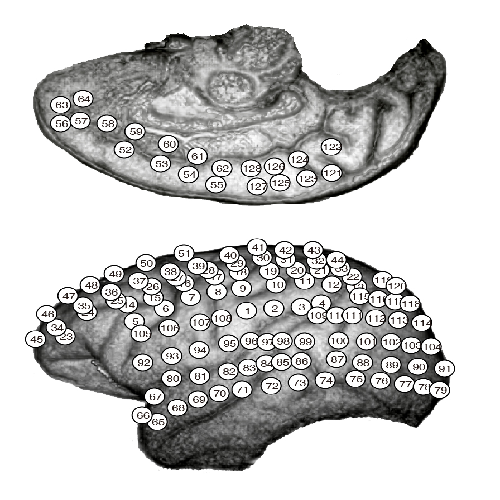

In [2]:
img = Image.open('ECoG_monkey/brainmap.jpg').resize((500,500))
img

<a id='process'></a>

## Data Pre-Processing

In [3]:
monkey_ecog_data = io.loadmat('ECoG_monkey/ECoG_monkey.mat', squeeze_me = True)

awake_cingulate = monkey_ecog_data['ecog_eyesopen'][0,:]
awake_occipital = monkey_ecog_data['ecog_eyesopen'][1,:]
awake_temporal = monkey_ecog_data['ecog_eyesopen'][2,:]


anes_cingulate =  monkey_ecog_data['ecog_anes'][0,:]
anes_occipital =  monkey_ecog_data['ecog_anes'][1,:]
anes_temporal =  monkey_ecog_data['ecog_anes'][2,:]

elec_num = monkey_ecog_data['elec_num']
fs = monkey_ecog_data['fs']
regions = monkey_ecog_data['labels']
states = ['Eyes Open','Anesthesia']
N = awake_cingulate.shape[0]
t_vector = np.arange(0, N/fs, 1/fs)
colors = ['midnightblue','darkmagenta','steelblue','c', 'mediumseagreen', 'darkorange']
dt = 1 / fs
T_exp = len(awake_cingulate) 

<a id='analyze'></a>

## Data Analysis

<a id='timeseries'></a>

## 1. Time Series Analysis

In [6]:
def plot_time_series(data1, label1, data2, label2, title, data3=None, label3=None):
    plt.figure(figsize=(16,2))
    plt.plot(t_vector, data1, label=label1, c='darkmagenta')
    plt.plot(t_vector, data2, label=label2, c='steelblue')
    if data3 is not None:
        plt.plot(t_vector, data3, label=label3, c='yellowgreen')
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (uV)')
    plt.xlim([0,5])
    plt.ylim([-2000, 2000])
    plt.title(title + " Time Series")

Here we plot a time series comparing the awake and anesthetized data for all brain regions. From a first glance, it appears that awake data has a higher frequency than anesthetized data. We were anticipating the anesthetized data to produce slow waves since anesthesia is "commonly used as a model of slow wave sleep, [...] ketamine-xylazine anesthesia reproduces the main features of sleep slow oscillation" and slow waves are often "associated with diminished consciousness even in the presence of high gamma activity" (Chauvette, S., Crochet, S., et. al., 2011; Murphy, M., Bruno, M. A., et. al., 2011). However, the monkeys in this study were injected with Medetomidine-Ketamine rather than XylazineKetamine. We will explore this further. 

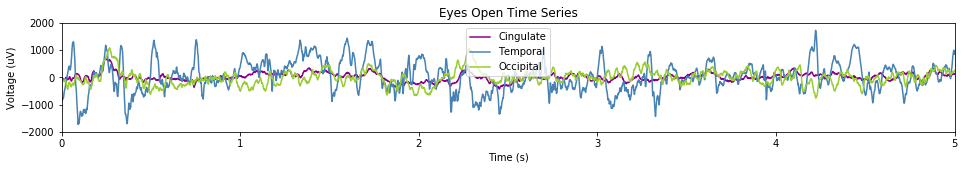

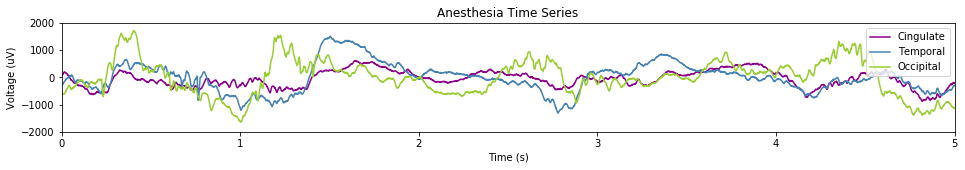

In [7]:
plot_time_series(awake_cingulate, 'Cingulate', awake_temporal, 'Temporal', 'Eyes Open', awake_occipital, 'Occipital')
plot_time_series(anes_cingulate, 'Cingulate', anes_temporal, 'Temporal', 'Anesthesia', anes_occipital, 'Occipital')

Since we are comparing the wake state to the anesthetized state, we've plotted each brain region and signal from the awake state compared to the anesthetized state. Across all regions it appears consistent that the awake state often produces higher frequencies than the anesthetized state. 

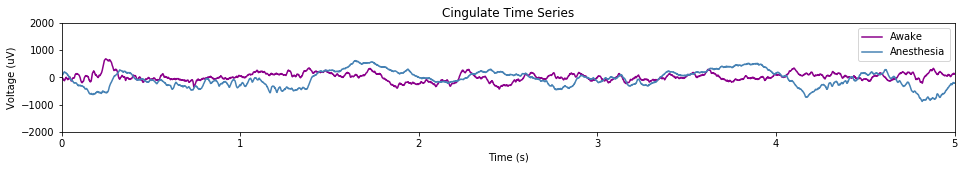

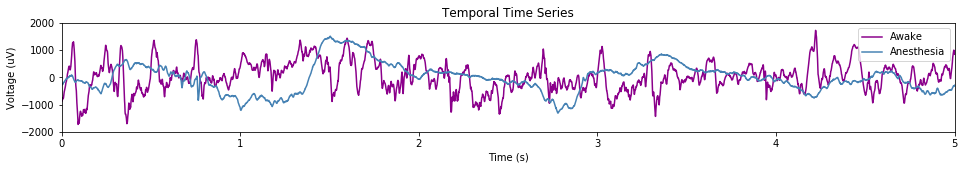

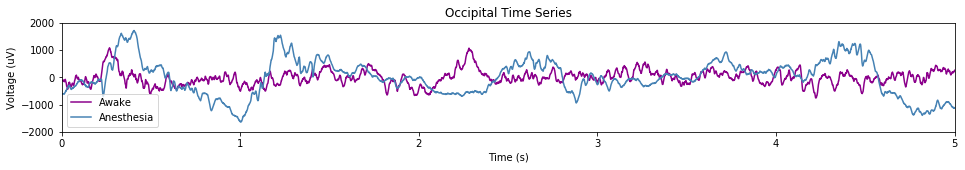

In [8]:
plot_time_series(awake_cingulate, 'Awake', anes_cingulate, 'Anesthesia', 'Cingulate')
plot_time_series(awake_temporal, 'Awake', anes_temporal, 'Anesthesia', 'Temporal')
plot_time_series(awake_occipital, 'Awake', anes_occipital, 'Anesthesia', 'Occipital')

<a id='psd'></a>

## 2. Fourier Transform & Power Spectral Density

Now, we will transform from time domain to frequency domain using the fourier transform. This will allow us to find which frequencies contribute the most during the awake state and compare that to the sleep state by plotting the power spectral density. 

### PSD State Comparisons Across Brain Regions

In [9]:
brain_wave_names = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
bandpass_values = [[0.5,4], [4,8], [8,13], [13,32], [32,100]]

In [10]:
def return_PSD_data(data):
    f_sp, t_sp, psd = signal.spectrogram(data, fs, mode = 'psd')
    psd = np.array([i.mean() for i in psd])
    return f_sp, t_sp, psd

In [11]:
def plot_PSD_state(f_sp, open_psd, anes_psd):
    plt.plot(f_sp, open_psd,label = 'Eyes Open', color = colors[1])
    plt.plot(f_sp, anes_psd,label = 'Anesthesia', color = 'steelblue')
    plt.xlabel("Frequency")
    plt.ylabel("Power Spectral Density")
    plt.yscale("log")
    plt.xlim(-5,500)
    plt.legend()
    
def plot_PSD_region(f_sp, temp_psd, occ_psd, cing_psd):
    plt.plot(f_sp, temp_psd,  label = 'Temporal', color = colors[1])
    plt.plot(f_sp, occ_psd, label = 'Occipital', color = colors[3])
    plt.plot(f_sp, cing_psd, label = 'Cingulate', color = colors[4])
    plt.xlabel("Frequency")
    plt.ylabel("Power Spectral Density")
    plt.yscale("log")
    plt.xlim(-5,500)
    plt.legend()

In [12]:
open_temp_f_sp, open_temp_t_sp, open_temp_psd = return_PSD_data(awake_temporal)
anes_temp_f_sp, anes_temp_t_sp,  anes_temp_psd = return_PSD_data(anes_temporal)

open_occ_f_sp, open_occ_t_sp, open_occ_psd = return_PSD_data(awake_occipital)
anes_occ_f_sp, anes_occ_t_sp,  anes_occ_psd = return_PSD_data(anes_occipital)

open_cing_f_sp, open_cing_t_sp, open_cing_psd = return_PSD_data(awake_cingulate)
anes_cing_f_sp, anes_cing_t_sp, anes_cing_psd = return_PSD_data(anes_cingulate)

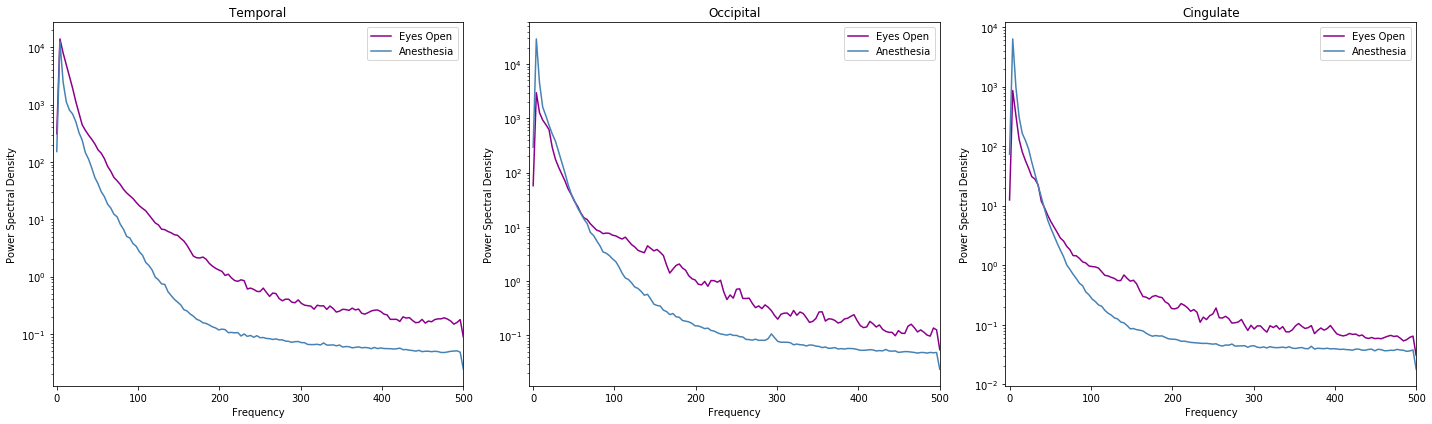

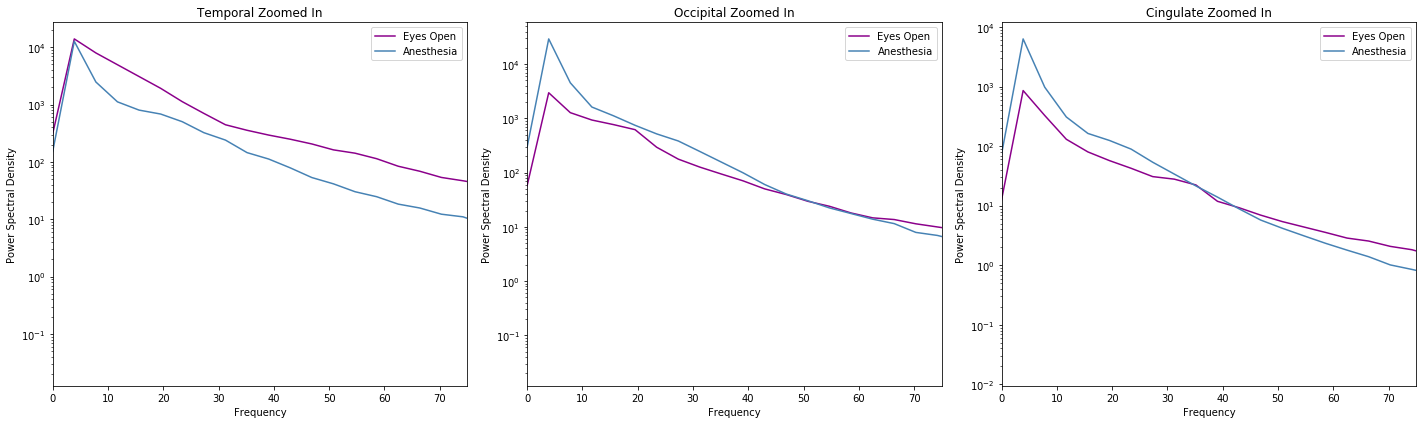

In [13]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Temporal')
plot_PSD_state(open_temp_f_sp, open_temp_psd, anes_temp_psd)

plt.subplot(1,3,2)
plt.title('Occipital')
plot_PSD_state(open_occ_f_sp, open_occ_psd, anes_occ_psd)

plt.subplot(1,3,3)
plt.title('Cingulate')
plot_PSD_state(open_cing_f_sp, open_cing_psd,anes_cing_psd)
plt.tight_layout()

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Temporal Zoomed In')
plot_PSD_state(open_temp_f_sp, open_temp_psd, anes_temp_psd)
plt.xlim([0,75])

plt.subplot(1,3,2)
plt.title('Occipital Zoomed In')
plot_PSD_state(open_occ_f_sp, open_occ_psd, anes_occ_psd)
plt.xlim([0,75])

plt.subplot(1,3,3)
plt.title('Cingulate Zoomed In')
plot_PSD_state(open_cing_f_sp, open_cing_psd,anes_cing_psd)
plt.tight_layout()
plt.xlim([0,75])

plt.show()

Upon analyzing the power spectral density, we could see that the awake signals contain stronger power across the range of frequencies compared to anesthetized signals. 
In other words, lower frequencies (slower waves) contribute more to the anesthesized signal. 

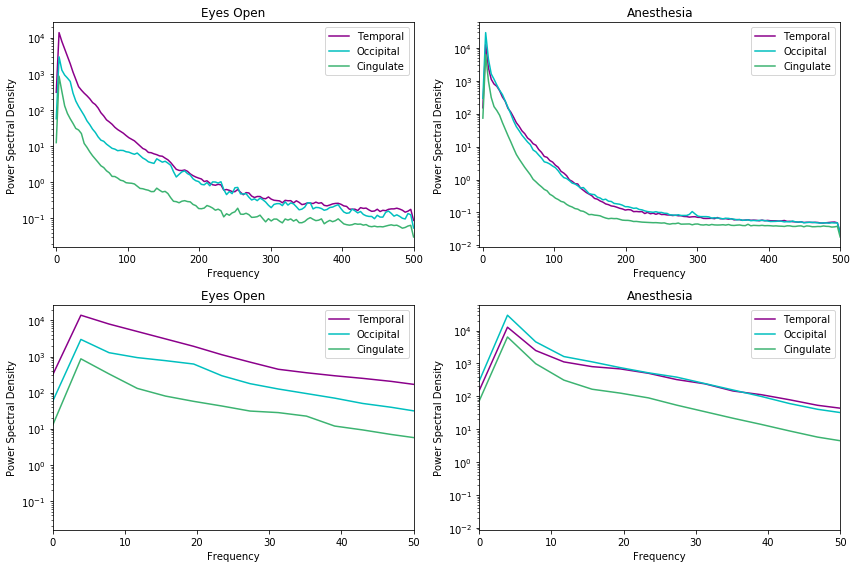

In [171]:
plt.figure(figsize=(12,8))
psd = [[open_temp_f_sp, open_temp_psd, open_occ_psd, open_cing_psd], 
        [anes_temp_f_sp, anes_temp_psd, anes_occ_psd, anes_cing_psd]]
for i in range(4):
    plt.subplot(2,2,i+1)
    if i == 2:
        plt.title(states[0])
        plot_PSD_region(psd[0][0], psd[0][1], psd[0][2], psd[0][3])
        plt.xlim([0,50])
    elif i == 3:
        plt.title(states[1])
        plot_PSD_region(psd[1][0], psd[1][1], psd[1][2], psd[1][3])
        plt.xlim([0,50])
    else:
        plt.title(states[i])
        plot_PSD_region(psd[i][0], psd[i][1], psd[i][2], psd[i][3])
plt.tight_layout()

Furthermore, we can see that about a 4Hz frequency contributes the most to both the awake and anesthetized signal. Each cortical area shows this same 4Hz contribution. This signifies that the underlying dominant frequency is from either the delta (0.5-4Hz) or theta (4-8Hz) band.

<a id='timefreq'></a>

## 3. Time-Frequency Analysis: STFT & Spectrogram
We will plot the frequencies across time to view how the frequencies change and which seem to contribute the most utilizing the Short Time Fourier Transform.

In [112]:
def plot_spectrogram(data, names, len_win, len_overlap):
    plt.figure(figsize=(40,15))
    for i in range(6): 
        f, t, spg = signal.spectrogram(data[i], fs, window='rect', \
        nperseg=int(fs*len_win), noverlap=int(fs*len_overlap), detrend=False)
        spg = spg*fs**2*len_win/2
        plt.subplot(3,2,i+1)
        plt.title(names[i])
        plt.imshow(np.log10(spg), aspect = 'auto', extent = [t[0], t[-1], f[-1], f[0]])
        plt.ylim(0,100)
        plt.xlabel('Time')
        plt.ylabel('Frequency')
        plt.colorbar()
    plt.tight_layout

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


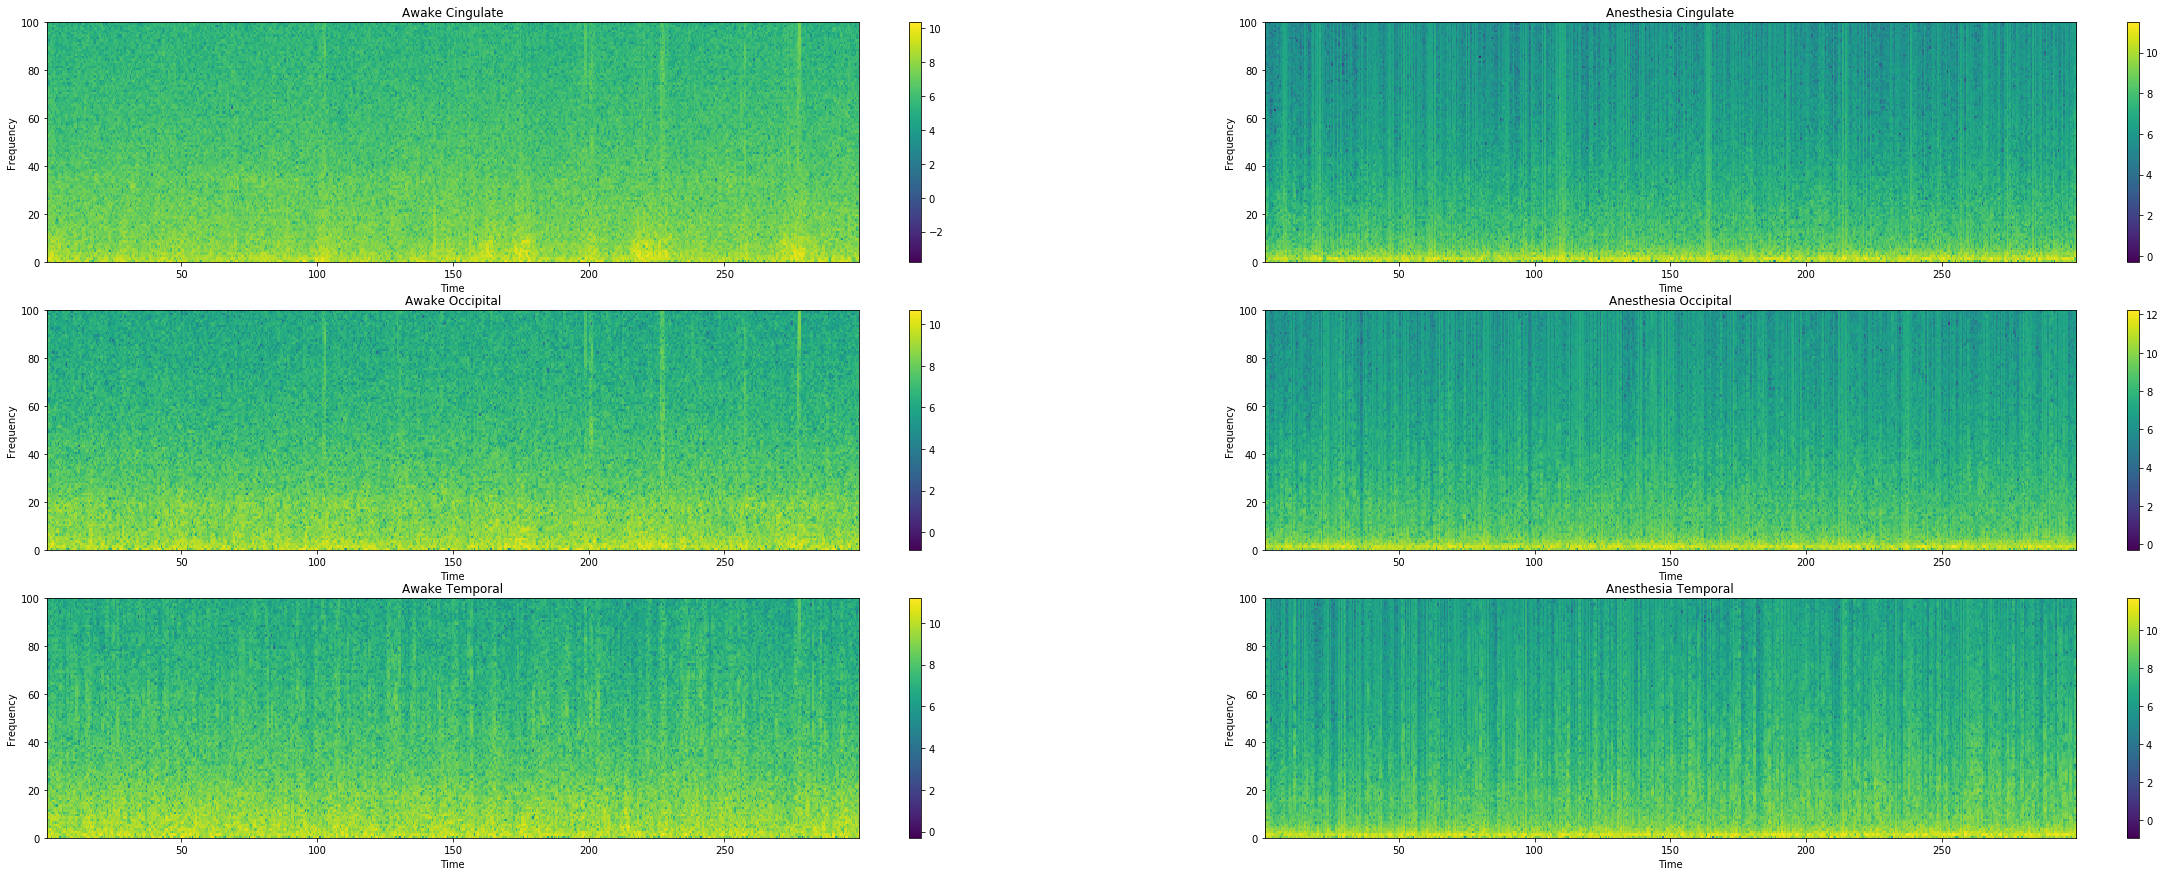

In [113]:
len_win = 1
len_overlap = 0.5
data = [awake_cingulate,  anes_cingulate, awake_occipital,anes_occipital, awake_temporal, anes_temporal]
names = ["Awake Cingulate", "Anesthesia Cingulate", "Awake Occipital", "Anesthesia Occipital",
        "Awake Temporal", "Anesthesia Temporal"]
plot_spectrogram(data, names, len_win, len_overlap)

The spectrograms for the awake data is noticeably brighter than the spectrograms for the anesthetized data, aside from the very low frequencies (< 2.5Hz). This allows us to conclude that higher frequencies are more present during the awake state than the anesthetized state overall. In the Cingulate region, there are periodic lines of yellow that appears to be present beginning around 20 seconds and occuring seemingly periodically every 50 seconds. This indicates that every 50 seconds, all of the frequencies contribute to the signal. 

<a id='filter'></a>

## 4. Filtering Each Brainwave

We apply a bandpass filter for each of the brainwaves, decomposing the signal into all of the brainwave components (delta, beta, alpha, etc.) and compare the awake state and sleep state side by side.

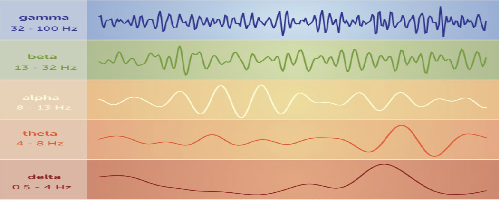

In [151]:
brainwaves = Image.open('Brainwaves.png').resize((500,200))
brainwaves

In [20]:
def plot_brainwave_decomp(awake, anes):
    plt.figure(figsize=(25,15))
    
    plt.subplot(6,2,1)
    plt.plot(t_vector, awake, color = 'cadetblue') #plot original signal
    plt.title("Awake Signal")
    plt.xlim(0,5)

    for i in range(0,10,2):
        FIR = signal.firwin(751, bandpass_values[int(i-0.5*i)], fs = fs, pass_zero = False)
        oscillation = np.convolve(awake, FIR, mode='same')
        plt.subplot(6,2,i+3)
        plt.plot(t_vector, oscillation, color = colors[int(i-0.5*i)])
        plt.xlabel("Time")
        plt.ylabel(brain_wave_names[int(i-0.5*i)])
        plt.ylim(-1500,1500)
        plt.xlim(0,5)

    plt.subplot(6,2,2)
    plt.plot(t_vector, anes, color = 'cadetblue') #plot original signal
    plt.title("Anesthesia Signal")
    plt.xlim(0,5)

    for i in range(0,10,2):
        FIR = signal.firwin(751, bandpass_values[int(i-0.5*i)], fs = fs, pass_zero = False)
        oscillation = np.convolve(anes, FIR, mode='same')
        plt.subplot(6,2,i+4)
        plt.plot(t_vector, oscillation, color = colors[int(i-0.5*i)])
        plt.xlabel("Time")
        plt.ylim(-1500,1500)
        plt.xlim(0,5)
    plt.tight_layout()

### Temporal Lobe: Awake vs. Anesthesia 

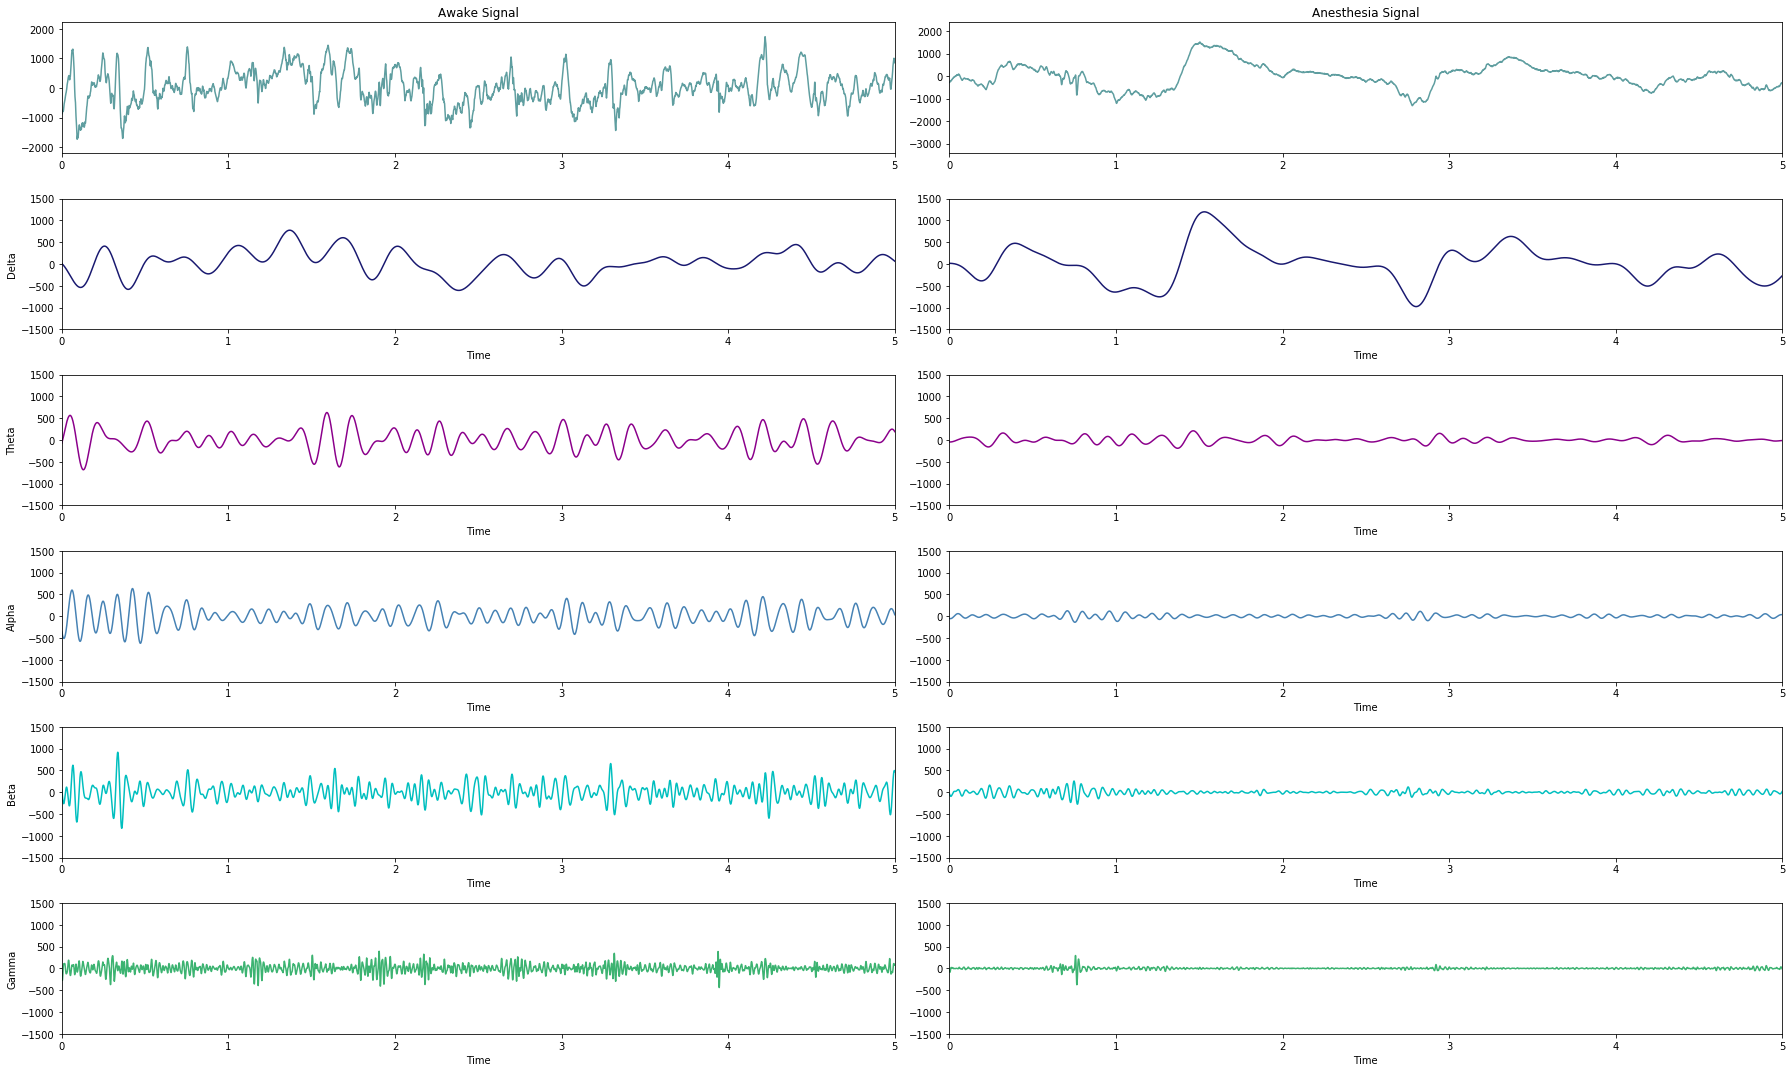

In [21]:
plot_brainwave_decomp(awake_temporal, anes_temporal)

After filtering the signal into various band components, we notice that the delta component maintains higher amplitude in the anesthetized signal. Subsequently all other components are noticeably smaller in amplitude in the anesthetized signal. In the awake state, it appears that all of the frequency bands contribute to the signal somewhat uniformly. However, we know from the spectrogram and the power spectral density that the lower frequencies contribute the most during both states. Nonetheless, all methods so far has clarified that for the awake signals, all of the frequencies contribute more than the anethetized signal except for the delta component. This is consistent with the idea that the delta component (slower waves) contribute most during the anesthetized state. This is also reflected in the occipital lobe plotted below.

### Occipital Lobe: Awake vs. Anesthesia

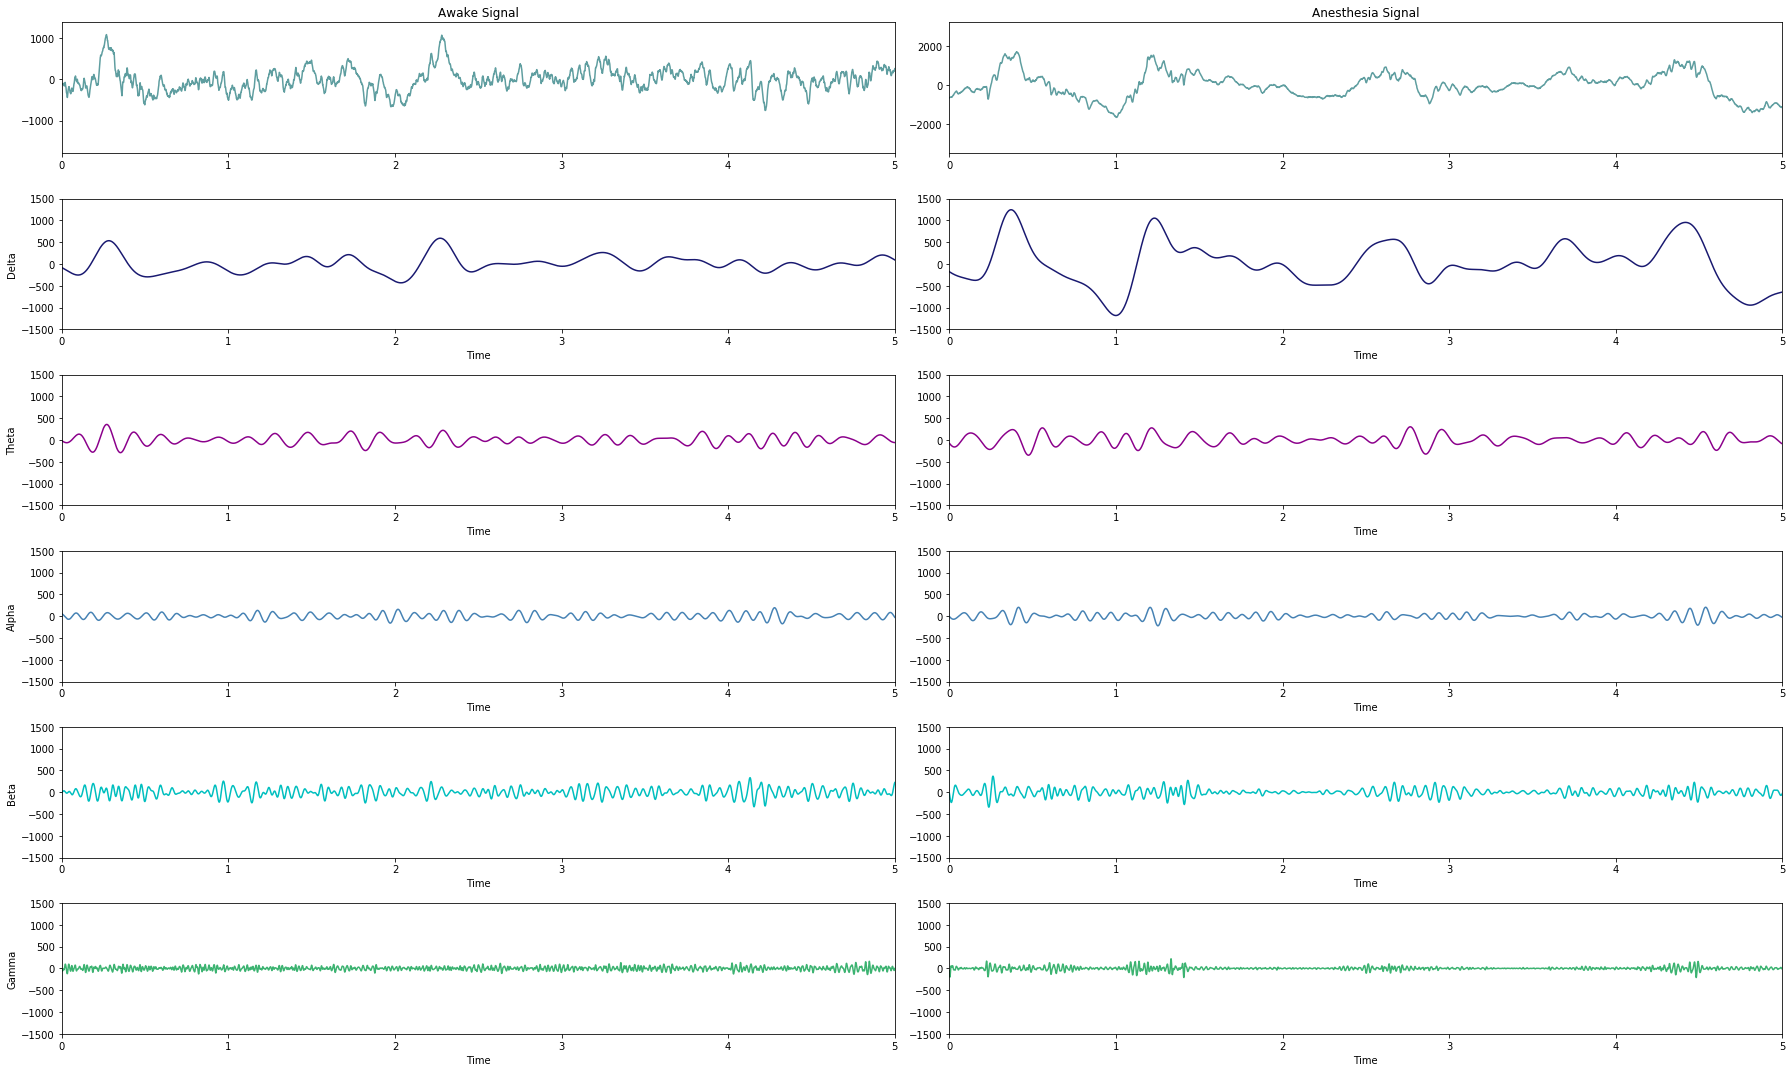

In [22]:
plot_brainwave_decomp(awake_occipital, anes_occipital)

### Cingulate Region: Awake vs. Anesthesia

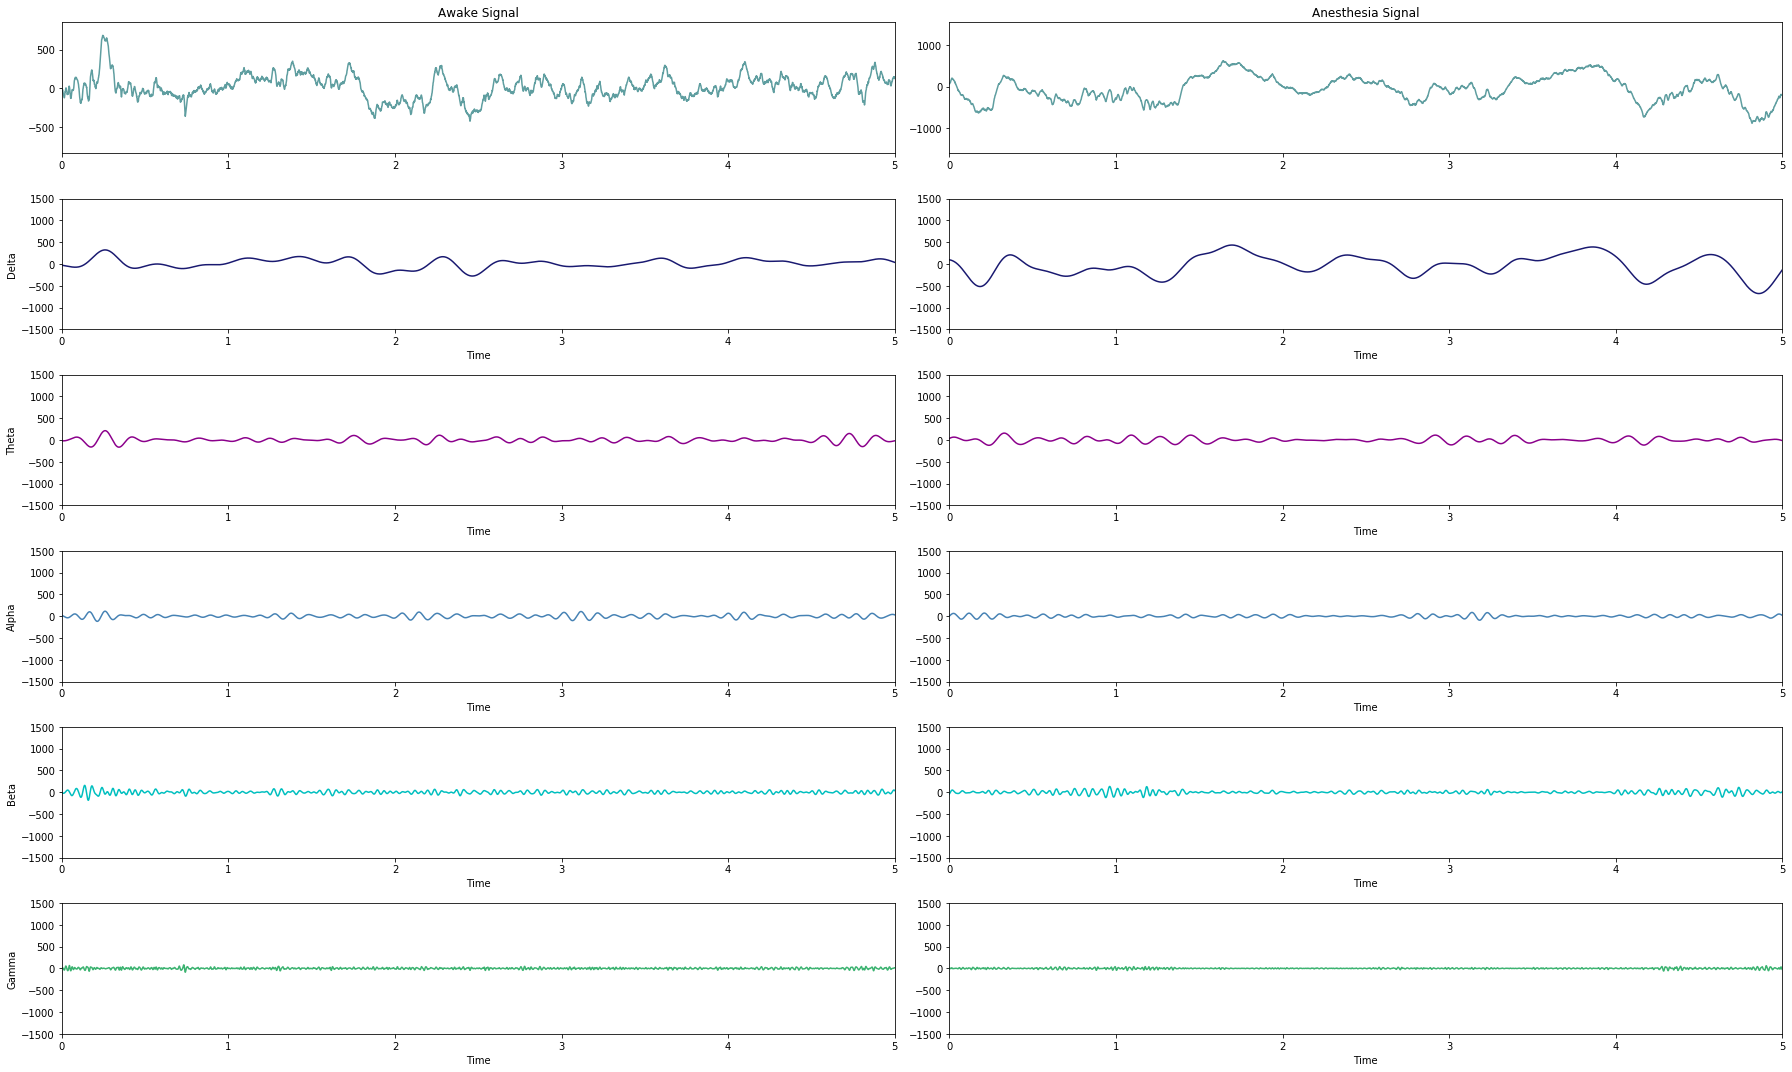

In [23]:
plot_brainwave_decomp(awake_cingulate, anes_cingulate)

In the cingulate region, one of the clear differences is each component seems to contribute equally in both states. However, one of our hypotheses was that the theta component in the awake signal would be consistent and continuous while the anesthetized signal would not show the same consistent and continuous theta frequency. In the plots above, there doesn't seem to be a noticeable difference. Next, we will look at the instantaneous power signal specifically for theta oscillations to gain deeper insight.

<a id='instant'></a>

## 5. Instantaneous Power Signal for Theta Oscillations 

In this section, we compute the analytic signal (omitting the negative frequencies) and compute the instantaneous power of the theta frequency through time in order to gauge whether or not theta oscillations are regular and continuous for all states. 

In [147]:
#plots the instantaneous power signal for a particular oscillation
def plot_theta_osc_power(data, cutoff):
    num_rows = 2
    num_columns = 3
    for i in range(num_rows*num_columns):
        plt.subplot(num_rows,num_columns, i+1)
        plt.ylabel("Power")
        plt.xlabel("Time")
        plt.title(names[i])
        if i == 2 or i == 5:
            plt.ylim(0,50000)
        elif i == 1 or i == 4:
            plt.ylim(0,150000)
        else:
            plt.ylim(0,500000)
        plt.xlim(0,10)
        theta_power = compute_instant_power_phase(data[i], cutoff)[1]
        plt.plot(t_vector, theta_power, color = colors[i])
    plt.tight_layout()

In [25]:
def compute_instant_power_phase(data, cutoff):
    FIR = signal.firwin(1200, cutoff, fs=fs, pass_zero=False)
    osc = np.convolve(data, FIR,mode='same')
    x_a = signal.hilbert(osc)
    phase = np.angle(x_a)
    power = np.abs(x_a)**2
    return phase, power

In [133]:
#plots the instantaneous power signal for a particular oscillation
def plot_theta_osc_phase(data, cutoff):
    num_rows = 2
    num_columns = 1
    for i in range(num_rows):
        plt.subplot(num_rows,num_columns, i+1)
        plt.ylabel("Instantaneous Phase")
        plt.xlabel("Time")
        plt.title(states[i])
        plt.xlim(0,5)
        theta_phase = compute_instant_power_phase(data[i], cutoff)[0]
        plt.plot(t_vector, theta_phase, color = colors[i])

    plt.tight_layout()

### Theta Oscillation Power in Temporal Cortex

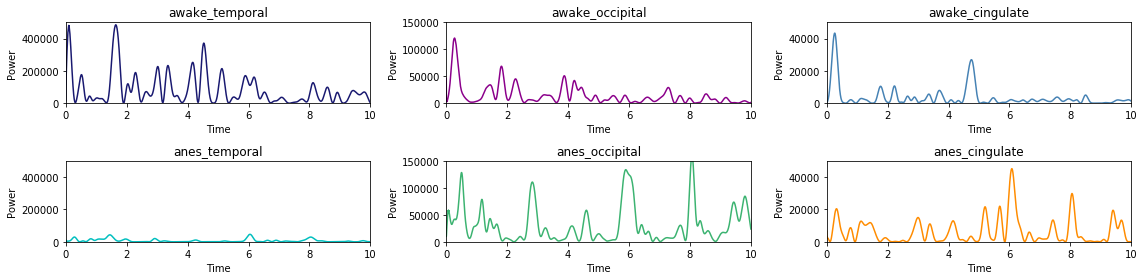

In [148]:
plt.figure(figsize=(16,4))
names = ['awake_temporal',  'awake_occipital', 'awake_cingulate', 'anes_temporal','anes_occipital','anes_cingulate']
plot_theta_osc_power([awake_temporal,  awake_occipital,awake_cingulate, anes_temporal, anes_occipital, anes_cingulate], [4,8])



In the temporal cortex, the theta frequency in awake signal is much more powerful than the theta frequency in the anesthetized signal. Unlike with the temporal cortex, the theta frequency in the occipital cortex appears to be more powerful in the anesthetized state compared to the awake state. Interestingly the cingulate seems to show no meaningful difference in theta frequency contribution across both states which oppooses our prior hypothesis.

<a id='sync'></a>

## Instantaneous Gamma Phase Synchrony
Many speculate that consciousness may arise from synchronization in the brain. In previous studies, it appears that the gamma oscillation (20-80 hz) synchronization over large portions of the cortex are required for conscious perception (Carozzo, S., Garbarino, S., Serra, S., & Sannita, W. G. 2010). Here, we explore this concept to analyze whether or not the instantaneous phase synchronization of gamma is a basis for conscious awareness. 

In [172]:
def plt_phase_synchrony(temp,occ,cing,title):
    
    plt.figure(figsize=(20,10))
    plt.subplot(3,1,1)

    temp_phase = compute_instant_power_phase(temp, [20,80])[0]
    occ_phase = compute_instant_power_phase(occ, [20,80])[0]
    cing_phase = compute_instant_power_phase(cing, [20,80])[0]


    plt.plot(t_vector, temp_phase, color = colors[4], label='Temporal')
    plt.plot(t_vector, occ_phase, color = colors[1], label = 'Occipital')
    plt.plot(t_vector, cing_phase, color = colors[2], label = 'Cingulate')
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Angle")
    plt.xlim(0,1)
    plt.legend()

    plt.subplot(3,1,2)
    cing_temp_synchrony = 1-np.sin(np.abs(temp_phase-cing_phase)/2)
    occ_temp_synchrony = 1-np.sin(np.abs(temp_phase-occ_phase)/2)
    occ_cing_synchrony = 1-np.sin(np.abs(occ_phase-cing_phase)/2)

    plt.plot(t_vector, cing_temp_synchrony, color = colors[4], label = 'Cingulate Temporal')
    plt.plot(t_vector, occ_temp_synchrony, color = colors[1], label = 'Occipital Temporal')
    plt.plot(t_vector, occ_cing_synchrony, color = colors[2], label = 'Occipital Cingulate')

    plt.title("Instantaneous Phase Synchrony")
    plt.xlabel("Time")
    plt.ylabel("Phase Synchrony")
    plt.xlim(0, 1)
    plt.legend()

    plt.subplot(3,1,3)
    average_sync = (cing_temp_synchrony + occ_temp_synchrony+occ_cing_synchrony)/3
    plt.plot(t_vector, average_sync, color = 'steelblue', label = 'Occipital Cingulate')
    plt.title("Averaged Phase Synchrony Across All Regions")
    plt.ylabel("Phase Synchronization")
    plt.xlabel("Time")
    plt.xlim(0,1)

    plt.tight_layout()
    return average_sync

For the plots below, the first plot displays the instantaneous phase for the gamma component for each brain region. We want to understand how often these gamma components for each region overlap with one another, therefore, we plot the phase synchrony. The second graph displays the percentage of synchrony from 0 - 1. 1 means that the phase of the gamma component of the respective regions completely overlap. The third graph takes all of the regional relationships and averages it out to understand, on average, the percentage of the gamma band phase synchrony.

### Anesthetized State 

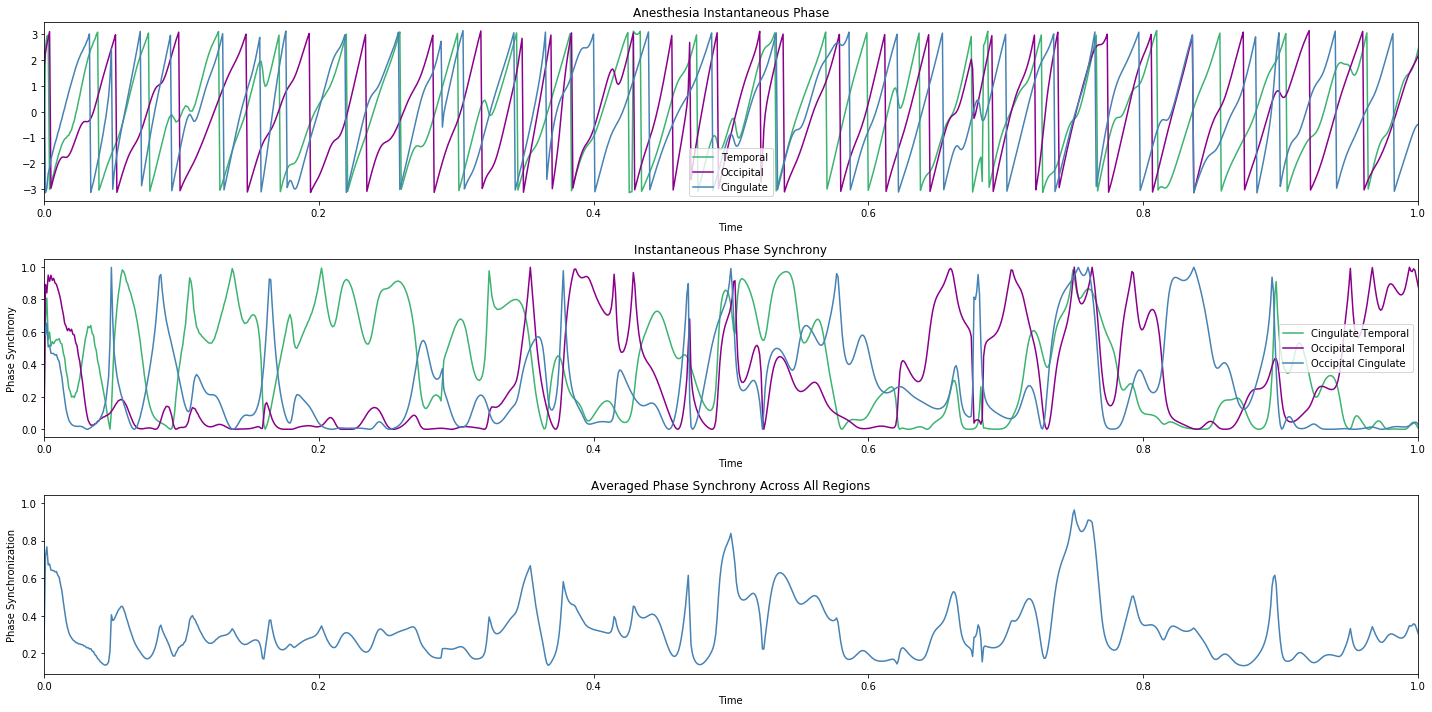

In [31]:
anes_average_sync = plt_phase_synchrony(anes_temporal, anes_occipital,anes_cingulate, "Anesthesia Instantaneous Phase")



### Awake State

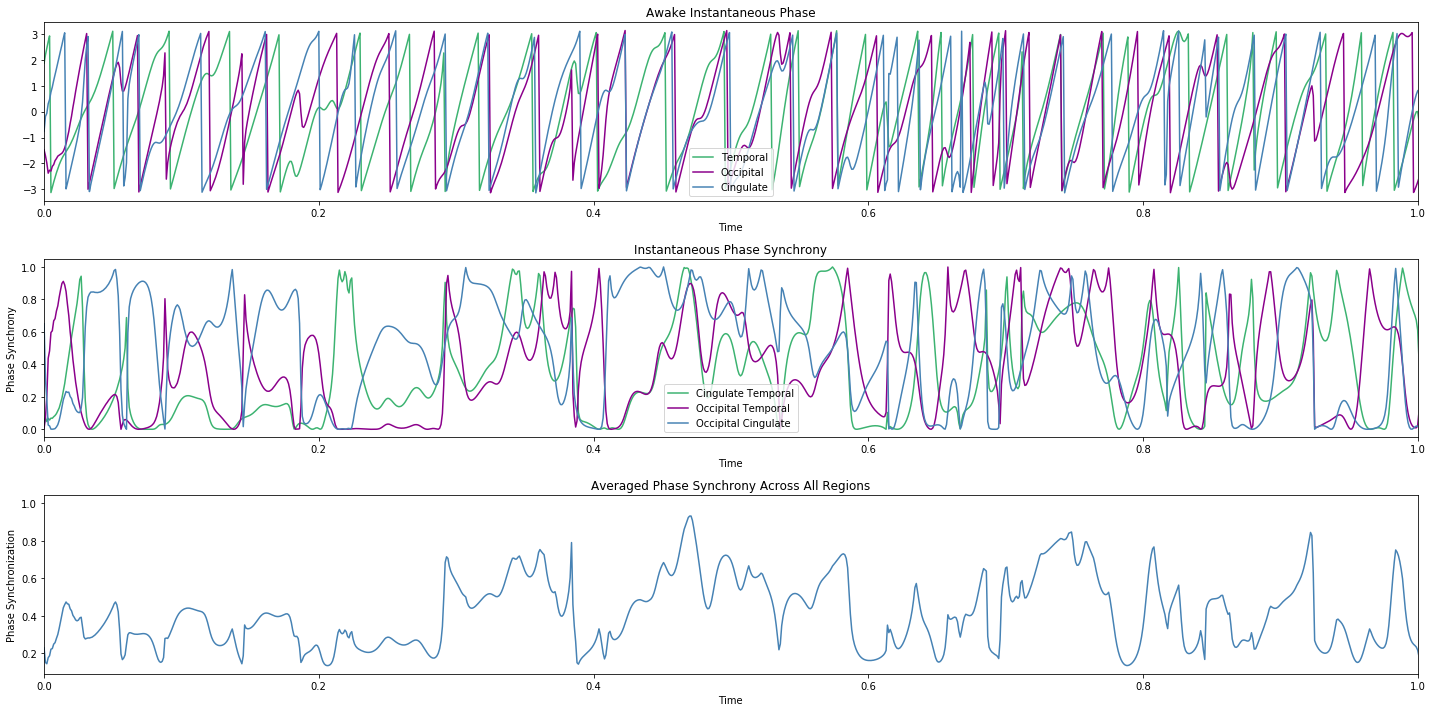

In [32]:
awake_average_sync = plt_phase_synchrony(awake_temporal,awake_occipital,awake_cingulate, "Awake Instantaneous Phase")


In [173]:
average_awake_synchrony = np.mean(awake_average_sync)
average_anes_synchrony = np.mean(anes_average_sync)

print('Average Awake Phase Synchronization: {}'.format(average_awake_synchrony))
print('Average Anesthesia Phase Synchronization: {}'.format(average_anes_synchrony))

Average Awake Phase Synchronization: 0.40860277509289905
Average Anesthesia Phase Synchronization: 0.4472666675853148


Our prior hypothesis was that there would be an increase in synchronization during the awake state, however, our findings opposed this hypothesis. Whether or not there is a neural basis for consciousness is inconclusive for our analysis.

<a id='conclude'></a>

## Conclusion & Discussions

Our overall findings initially confirmed our belief that awake states produces higher overall frequencies as compared to anesthetized states. Once we figured out which frequencies specifically contribute to both signals, we found that awake signals contain more powerful frequencies on the range of about 4Hz and above (theta waves and above). This confirms our hypothesis of awake states maintaining a primarily higher range of frequencies, with anesthetized states mainly containing lower-range frequencies (delta waves). A spectrogram revealed that this pattern was consistent across time. However, we noticed that the cingulate region contained spikes at about every 50 seconds where all ranges of frequencies contributed more evenly to the signal. In the temporal and occipital lobe, we found that the delta component in the awake state maintains a higher amplitude than in the anesthetized state. However, the cingulate region differs in that each component seems to contribute equally across both the awake and anesthetized states. Our initial hypothesis proposed that the theta component in the awake state would have a higher-power contribution than in anesthesia, but the data refutes it.


<a id='consider'></a>

## Limitations
In terms of a basis for consciousness, we were only able to look at three brain regions and therefore, cannot account for additional regions that may contribute to the synchronization rates. Additionally, we were working under the assumption that the Medetomidine-Ketamine anesthesia induces a state of slow wave sleep, however, the research we found was only about XylazineKetamine. These anesthesia methods may work differently. We are also assuming this state reflects a lack of consciousness and this is currently still under investigation. Lastly, our lack of deep domain knowledge of neuroscience may contribute to certain discrepencies in the data. 

<a id='refer'></a>

## References
1. Alkire, M. T., Hudetz, A. G., & Tononi, G. (2008). Consciousness and anesthesia. Science, 322(5903), 876-880.
2. Chauvette, S., Crochet, S., Volgushev, M., & Timofeev, I. (2011). Properties of slow oscillation during slow-wave sleep and anesthesia in cats. Journal of Neuroscience, 31(42), 14998-15008.
3. Groppe, D. M., Bickel, S., Keller, C. J., Jain, S. K., Hwang, S. T., Harden, C., & Mehta, A. D. (2013). Dominant frequencies of resting human brain activity as measured by the electrocorticogram. Neuroimage, 79, 223-233.
4. Hameroff, S. (2010). The “conscious pilot”—dendritic synchrony moves through the brain to mediate consciousness. Journal of biological physics, 36(1), 71-93.
5. Igawa, M., Atsumi, Y., Takahashi, K., Shiotsuka, S., Hirasawa, H., Yamamoto, R., ... & Koizumi, H.  (2001). Activation of visual cortex in REM sleep measured by 24‐channel NIRS imaging. Psychiatry and clinical neurosciences, 55(3), 187-188.
6. MacKay, W. A. (1997). Synchronized neuronal oscillations and their role in motor processes. Trends in  cognitive sciences, 1(5), 176-183.
7. Nishida, M., Hirai, N., Miwakeichi, F., Maehara, T., Kawai, K., Shimizu, H., & Uchida, S. (2004). Theta oscillation in the human anterior cingulate cortex during all-night sleep: an electrocorticographic study. Neuroscience research, 50(3), 331-341.

<a id='contribute'></a>
## Contributions 